A Machine Learning Model for Stock Market Prediction. Stock market prediction is the act of trying to determine the future value of a company stock or other financial instrument traded on a financial exchange

# Stock Market Prediction and Forecasting using Stacked LSTM

In [ ]:
# Collecting the Stock Data
# Preprocess the Data i.e. Train and Test
# Create a stacked LSTM model
# Predict the test data and plot the output
# Predict the future 30 days and plot the output

In [ ]:
# Keras and Tensorflow

In [ ]:
# Go to Pandas - datareader,
# Remote Data Access
# Goto Tiingo site (Click on the Tiingo link)
# Find your own API token
# 39848c5baeed2461dbfaced78ac6bc370de58419

In [2]:
!pip install pandas-datareader

DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



   ---------------------------------------- 109.5/109.5 kB 1.3 MB/s eta 0:00:00


In [3]:
# Data Scollection
import pandas_datareader as pdr

In [4]:
key = '39848c5baeed2461dbfaced78ac6bc370de58419'

39848c5baeed2461dbfaced78ac6bc370de58419


In [5]:
df = pdr.get_data_tiingo('AAPL', api_key=key)

In [6]:
df.to_csv('Apple_File.csv')

In [7]:
import pandas as pd

In [8]:
df = pd.read_csv("C:/Users/Nishant Moona/Downloads/Stock Market Prediction/Apple_File.csv")

In [10]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2019-11-18 00:00:00+00:00,267.10,267.43,264.23,265.80,21700897,64.738328,64.818312,64.042713,64.423241,86803588,0.0,1.0
1,AAPL,2019-11-19 00:00:00+00:00,266.29,268.00,265.39,267.90,19069597,64.542005,64.956466,64.323867,64.932228,76278388,0.0,1.0
2,AAPL,2019-11-20 00:00:00+00:00,263.19,266.08,260.40,265.54,26609919,63.790643,64.491106,63.114417,64.360224,106439676,0.0,1.0
3,AAPL,2019-11-21 00:00:00+00:00,262.01,264.01,261.18,263.69,30348778,63.504640,63.989390,63.303469,63.911830,121395112,0.0,1.0
4,AAPL,2019-11-22 00:00:00+00:00,261.78,263.18,260.84,262.59,16331263,63.448894,63.788219,63.221062,63.645218,65325052,0.0,1.0


In [11]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,AAPL,2024-11-11 00:00:00+00:00,224.23,225.70,221.500,225.00,42005602,224.23,225.70,221.500,225.00,42005602,0.0,1.0
1254,AAPL,2024-11-12 00:00:00+00:00,224.23,225.59,223.355,224.55,40398299,224.23,225.59,223.355,224.55,40398299,0.0,1.0
1255,AAPL,2024-11-13 00:00:00+00:00,225.12,226.65,222.760,224.01,48566217,225.12,226.65,222.760,224.01,48566217,0.0,1.0
1256,AAPL,2024-11-14 00:00:00+00:00,228.22,228.87,225.000,225.02,44923941,228.22,228.87,225.000,225.02,44923941,0.0,1.0
1257,AAPL,2024-11-15 00:00:00+00:00,225.00,226.92,224.270,226.40,47923696,225.00,226.92,224.270,226.40,47923696,0.0,1.0


In [12]:
# Resetting the index, values will go inside
df1 = df.reset_index()['close']

In [13]:
df1

0       267.10
1       266.29
2       263.19
3       262.01
4       261.78
         ...  
1253    224.23
1254    224.23
1255    225.12
1256    228.22
1257    225.00
Name: close, Length: 1258, dtype: float64

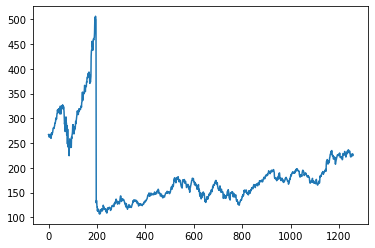

In [14]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [15]:
## LSTM are sensitive to the scale of data. So we apply the MinMax scaler.
# Values are in scale i.e. 313.43, 312.52, 325.63
# Transforming our values

In [16]:
import numpy as np

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [18]:
df1.shape

(1258, 1)

In [19]:
df1

array([[0.40140263],
       [0.39937383],
       [0.39160927],
       ...,
       [0.29625548],
       [0.30402004],
       [0.29595492]])

In [20]:
# Splitting the data into Train and Test 
training_size = int(len(df1)*0.65)
test_size = len(df1) - training_size
train_data, test_data = df1[0: training_size,:], df1[training_size:len(df1),:1]


In [21]:
training_size, test_size

(817, 441)

In [22]:
len(train_data), len(test_data)

(817, 441)

In [23]:
import numpy
# COnvert an array of values into a dataset matrix
def create_dataset(dataset, time_step = 1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i+time_step), 0]  # i = 0, 0, 1, 2, 3
        dataX.append(a)
        dataY.append(dataset[1 + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [24]:
# Reshape into X=t, t+1, t+2, t+3, and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [26]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [27]:
print(X_test.shape), print(y_test.shape)

(340, 100)
(340,)


(None, None)

In [29]:
# Reshaping input to be [samples, time steps, features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1) # shape of 0 is 716, shape of [1] is timestamp i.e 100, 1 is to convert into 3-Dimension
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [30]:
# Create the stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [32]:
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (100,1)))
model.add(LSTM(50, return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer = 'adam')

In [33]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_2 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_3 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [34]:
model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 100, batch_size = 64, verbose = 1)

Epoch 1/100
12/12 [==============================] - 22s 834ms/step - loss: 0.0733 - val_loss: 0.0328
Epoch 2/100
12/12 [==============================] - 8s 633ms/step - loss: 0.0073 - val_loss: 0.0827
Epoch 3/100
12/12 [==============================] - 7s 635ms/step - loss: 0.0011 - val_loss: 0.0569
Epoch 4/100
12/12 [==============================] - 5s 396ms/step - loss: 2.1764e-04 - val_loss: 0.0481
Epoch 5/100
12/12 [==============================] - 7s 593ms/step - loss: 1.0053e-04 - val_loss: 0.0543
Epoch 6/100
12/12 [==============================] - 7s 571ms/step - loss: 2.9465e-05 - val_loss: 0.0571
Epoch 7/100
12/12 [==============================] - 7s 585ms/step - loss: 7.9253e-06 - val_loss: 0.0564
Epoch 8/100
12/12 [==============================] - 6s 519ms/step - loss: 4.1270e-06 - val_loss: 0.0556
Epoch 9/100
12/12 [==============================] - 6s 503ms/step - loss: 2.6573e-06 - val_loss: 0.0553
Epoch 10/100
12/12 [==============================] - 6s 480ms/ste

12/12 [==============================] - 7s 586ms/step - loss: 1.9519e-08 - val_loss: 0.0552
Epoch 79/100
12/12 [==============================] - 7s 607ms/step - loss: 2.0000e-08 - val_loss: 0.0552
Epoch 80/100
12/12 [==============================] - 5s 453ms/step - loss: 1.8337e-08 - val_loss: 0.0552
Epoch 81/100
12/12 [==============================] - 7s 580ms/step - loss: 2.0004e-08 - val_loss: 0.0551
Epoch 82/100
12/12 [==============================] - 6s 490ms/step - loss: 1.9848e-08 - val_loss: 0.0552
Epoch 83/100
12/12 [==============================] - 6s 537ms/step - loss: 1.7323e-08 - val_loss: 0.0552
Epoch 84/100
12/12 [==============================] - 7s 569ms/step - loss: 1.8092e-08 - val_loss: 0.0552
Epoch 85/100
12/12 [==============================] - 7s 554ms/step - loss: 1.5106e-08 - val_loss: 0.0551
Epoch 86/100
12/12 [==============================] - 6s 540ms/step - loss: 1.5650e-08 - val_loss: 0.0552
Epoch 87/100
12/12 [==============================] - 7s 54

In [35]:
import tensorflow as tf

In [46]:
tf.__version__

'2.12.0'

In [47]:
# Prediction and check performance metrics
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

11/11 [==============================] - 1s 72ms/step


In [48]:
# Transform back to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [49]:
# Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train, train_predict))

283.9755816052391

In [50]:
# test Data RMSE
math.sqrt(mean_squared_error(y_test, test_predict))

284.2328534632603

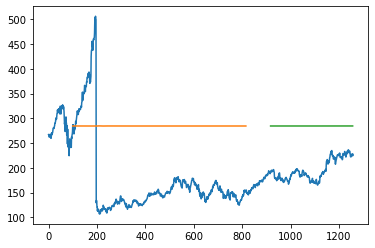

In [51]:
# Plotting
# Shift train predictions for plotting
look_back = 100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back: len(train_predict) + look_back, :] = train_predict

# SHift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict) + (look_back*2) + 1:len(df1)-1, :] = test_predict

#Plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()


In [52]:
len(test_data)

441

In [53]:
# Total data is 441, we take previous 100 days to predict the future data
x_input = test_data[341:].reshape(1,-1) 
x_input.shape

(1, 100)

In [54]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [56]:
temp_input

[0.26667501565435187,
 0.2740137758296806,
 0.27724483406386974,
 0.28661239824671253,
 0.28773951158422034,
 0.29525360050093924,
 0.29858484658735124,
 0.2981840951784595,
 0.29973700688791477,
 0.29946149029430175,
 0.29477770820288035,
 0.30056355666875384,
 0.30141515341264863,
 0.30354414527238566,
 0.29968691296180333,
 0.30795241077019403,
 0.30597370068879143,
 0.290369442705072,
 0.2855604257983719,
 0.2893926111458985,
 0.2854852849092047,
 0.2857107075767063,
 0.283706950532248,
 0.29009392611145896,
 0.290369442705072,
 0.2896931747025672,
 0.27421415153412637,
 0.27539135879774573,
 0.28515967438948026,
 0.30564809016906697,
 0.303969943644333,
 0.2996368190356919,
 0.3018910457107075,
 0.2993863494051346,
 0.30226675015654353,
 0.30294301815904817,
 0.31599248591108325,
 0.29898559799624297,
 0.3004132748904195,
 0.29763306199123346,
 0.30046336881653096,
 0.2876643706950532,
 0.2978835316217909,
 0.3073262366938008,
 0.3060738885410143,
 0.3023418910457107,
 0.311734502

In [55]:
# Demonstrate prediction for next 10 days
from numpy import array

lst_output = []
n_steps = 100
i = 0
while(i<30):
    if(len(temp_input)>100): # It's taking after the 100 position
        x_input = np.array(temp_input[1:]) # Considering the 1st position of new prediction
        print("{} day input {}".format(i, x_input))
        x_input = x_input.reshape(1, -1)
        x_input = x_input.reshape((1, n_steps, 1))
        # print(x_input)
        yhat = model.predict(x_input, verbose = 0)
        print("{} day output {}".format (i, yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        # print(temp_input)
        lst_output.extend(yhat.tolist())
        i = i+1
    else:
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose = 0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i = i+1
        
print(lst_output)

[0.44492194]
101
1 day input [0.25993738 0.27529117 0.2841077  0.28731371 0.29931121 0.30301816
 0.3051722  0.31594239 0.30239198 0.30983093 0.31949906 0.32055103
 0.30567314 0.29390106 0.29422668 0.29335003 0.29597996 0.27977458
 0.27714465 0.27832185 0.27902317 0.2804258  0.2886412  0.27932373
 0.28308078 0.25655604 0.25144646 0.25793363 0.26667502 0.27401378
 0.27724483 0.2866124  0.28773951 0.2952536  0.29858485 0.2981841
 0.29973701 0.29946149 0.29477771 0.30056356 0.30141515 0.30354415
 0.29968691 0.30795241 0.3059737  0.29036944 0.28556043 0.28939261
 0.28548528 0.28571071 0.28370695 0.29009393 0.29036944 0.28969317
 0.27421415 0.27539136 0.28515967 0.30564809 0.30396994 0.29963682
 0.30189105 0.29938635 0.30226675 0.30294302 0.31599249 0.2989856
 0.30041327 0.29763306 0.30046337 0.28766437 0.29788353 0.30732624
 0.30607389 0.30234189 0.3117345  0.31812148 0.31293676 0.31386349
 0.32100188 0.32470883 0.32315592 0.31038197 0.30990607 0.31201002
 0.31699436 0.31767063 0.30872887 0

8 day output [[0.44478655]]
9 day input [0.30239198 0.30983093 0.31949906 0.32055103 0.30567314 0.29390106
 0.29422668 0.29335003 0.29597996 0.27977458 0.27714465 0.27832185
 0.27902317 0.2804258  0.2886412  0.27932373 0.28308078 0.25655604
 0.25144646 0.25793363 0.26667502 0.27401378 0.27724483 0.2866124
 0.28773951 0.2952536  0.29858485 0.2981841  0.29973701 0.29946149
 0.29477771 0.30056356 0.30141515 0.30354415 0.29968691 0.30795241
 0.3059737  0.29036944 0.28556043 0.28939261 0.28548528 0.28571071
 0.28370695 0.29009393 0.29036944 0.28969317 0.27421415 0.27539136
 0.28515967 0.30564809 0.30396994 0.29963682 0.30189105 0.29938635
 0.30226675 0.30294302 0.31599249 0.2989856  0.30041327 0.29763306
 0.30046337 0.28766437 0.29788353 0.30732624 0.30607389 0.30234189
 0.3117345  0.31812148 0.31293676 0.31386349 0.32100188 0.32470883
 0.32315592 0.31038197 0.30990607 0.31201002 0.31699436 0.31767063
 0.30872887 0.29823419 0.2907201  0.28846587 0.29207264 0.29024421
 0.30216656 0.30086412 

 0.44487244 0.44489986 0.44492596 0.44494972]
17 day output [[0.44497]]
18 day input [0.27977458 0.27714465 0.27832185 0.27902317 0.2804258  0.2886412
 0.27932373 0.28308078 0.25655604 0.25144646 0.25793363 0.26667502
 0.27401378 0.27724483 0.2866124  0.28773951 0.2952536  0.29858485
 0.2981841  0.29973701 0.29946149 0.29477771 0.30056356 0.30141515
 0.30354415 0.29968691 0.30795241 0.3059737  0.29036944 0.28556043
 0.28939261 0.28548528 0.28571071 0.28370695 0.29009393 0.29036944
 0.28969317 0.27421415 0.27539136 0.28515967 0.30564809 0.30396994
 0.29963682 0.30189105 0.29938635 0.30226675 0.30294302 0.31599249
 0.2989856  0.30041327 0.29763306 0.30046337 0.28766437 0.29788353
 0.30732624 0.30607389 0.30234189 0.3117345  0.31812148 0.31293676
 0.31386349 0.32100188 0.32470883 0.32315592 0.31038197 0.30990607
 0.31201002 0.31699436 0.31767063 0.30872887 0.29823419 0.2907201
 0.28846587 0.29207264 0.29024421 0.30216656 0.30086412 0.2940263
 0.2940263  0.29625548 0.30402004 0.29595492 0.

 0.44501466 0.4450179  0.44501877 0.44501776]
25 day output [[0.4450153]]
26 day input [0.25655604 0.25144646 0.25793363 0.26667502 0.27401378 0.27724483
 0.2866124  0.28773951 0.2952536  0.29858485 0.2981841  0.29973701
 0.29946149 0.29477771 0.30056356 0.30141515 0.30354415 0.29968691
 0.30795241 0.3059737  0.29036944 0.28556043 0.28939261 0.28548528
 0.28571071 0.28370695 0.29009393 0.29036944 0.28969317 0.27421415
 0.27539136 0.28515967 0.30564809 0.30396994 0.29963682 0.30189105
 0.29938635 0.30226675 0.30294302 0.31599249 0.2989856  0.30041327
 0.29763306 0.30046337 0.28766437 0.29788353 0.30732624 0.30607389
 0.30234189 0.3117345  0.31812148 0.31293676 0.31386349 0.32100188
 0.32470883 0.32315592 0.31038197 0.30990607 0.31201002 0.31699436
 0.31767063 0.30872887 0.29823419 0.2907201  0.28846587 0.29207264
 0.29024421 0.30216656 0.30086412 0.2940263  0.2940263  0.29625548
 0.30402004 0.29595492 0.44492194 0.44491199 0.44489998 0.44488189
 0.4448584  0.44483262 0.44480976 0.444793

In [57]:
day_new = np.arange(1, 101)
day_pred = np.arange(101, 131)

In [59]:
import matplotlib.pyplot as plt

In [60]:
len(df1)

1258

In [61]:
df3 = df1.tolist()
df3.extend(lst_output)

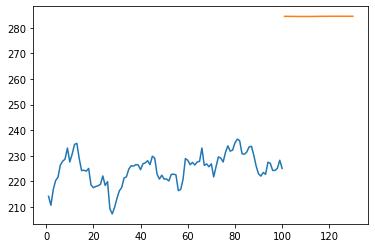

In [62]:
plt.plot(day_new, scaler.inverse_transform(df1[1158:])) # Total value is 1258, we are taking 100 previous data
plt.plot(day_pred, scaler.inverse_transform(lst_output))

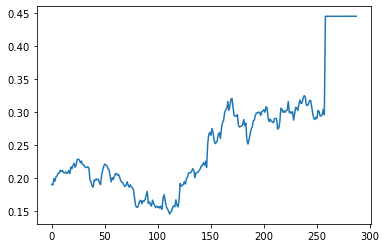

In [69]:
df3 = df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1000:])

In [63]:
df3 = scaler.inverse_transform(df3).tolist()

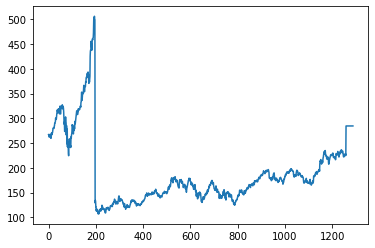

In [64]:
plt.plot(df3)